<a href="https://colab.research.google.com/github/jpdeleon/chronos/blob/master/notebooks/examples-cluster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#!pip install git+https://github.com/jpdeleon/chronos.git@master

# run isochrones in star module

In [2]:
toiid = 179

In [3]:
import chronos as cr

Created TAP+ (v1.2.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443
Created TAP+ (v1.2.1) - Connection:
	Host: geadata.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443


In [4]:
l = cr.ShortCadence(toiid=toiid)
lc = l.get_lc()

Target: TOI 179
Available sectors: [2 3]
Using sector=2.
Searching lightcurvefile for TIC 207141131 (sector 2)
Found 1 lightcurves


Using period=4.1374 d, epoch=1354.59 BTJD, duration=1.83 hr
Using biweight filter with window_length=0.23 day


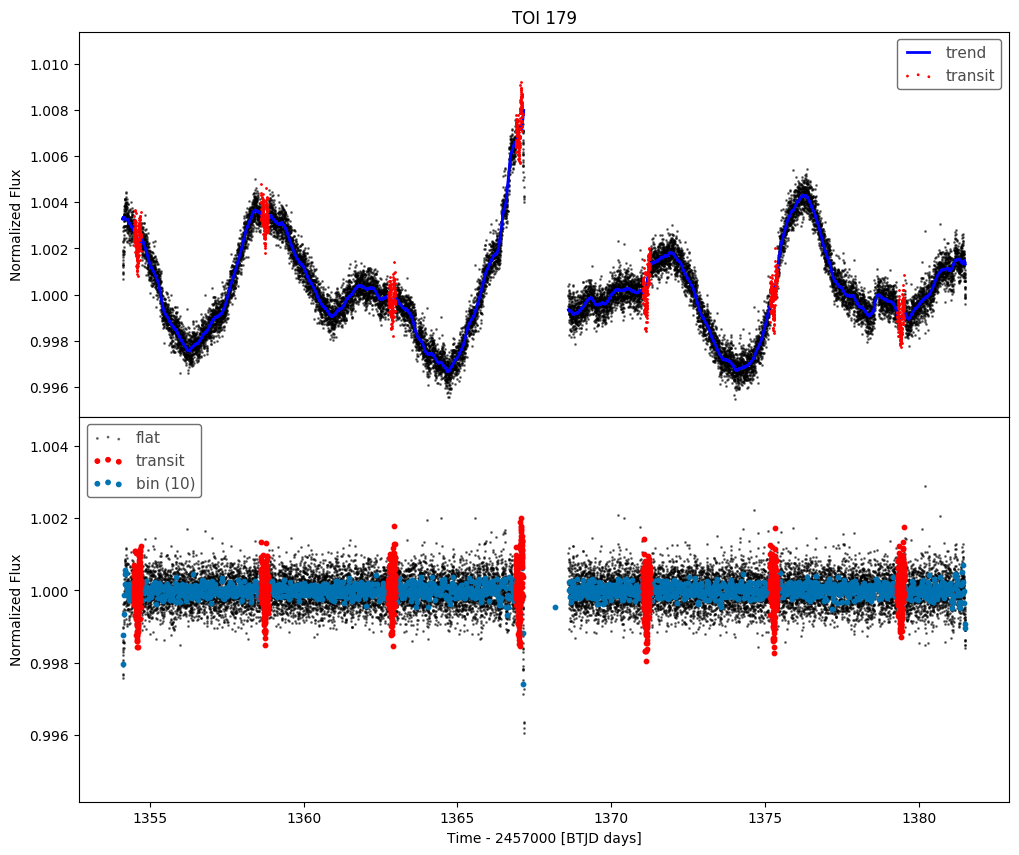

In [5]:
fig = l.plot_trend_flat_lcs(lc)

In [6]:
flat = l.get_flat_lc(lc)

Using biweight filter with window_length=0.23 day


  0%|          | 0/2501 periods | 00:00<?

Transit Least Squares TLS 1.0.23 (12 March 2019)
Creating model cache for 28 durations
Searching 1831 data points, 2501 periods from 0.601 to 13.695 days
Using all 8 CPU threads


100%|██████████| 2501/2501 periods | 00:05<00:00


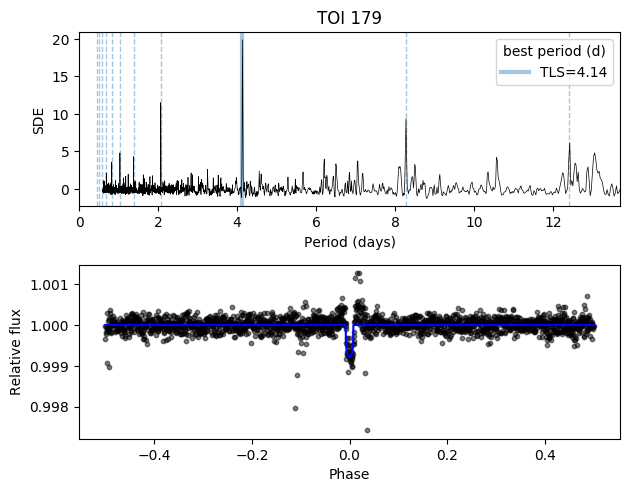

In [7]:
fig = l.run_tls(flat.bin(10), plot=True)

(-0.1, 0.1)

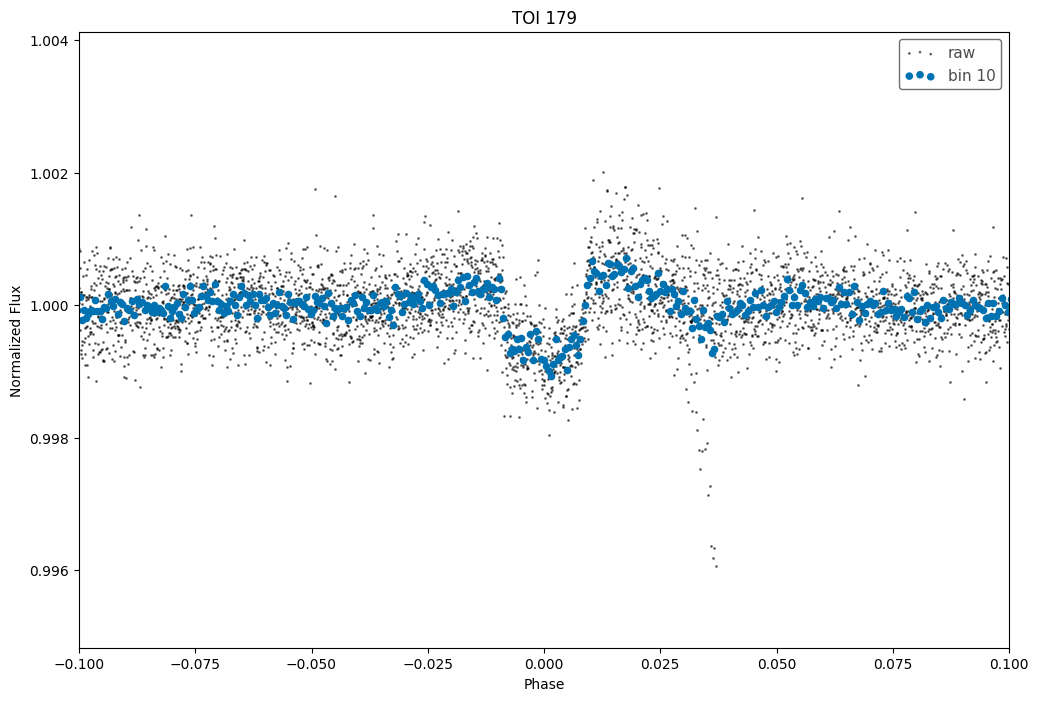

In [8]:
ax = l.plot_fold_lc(flat)
ax.set_xlim(-0.1,0.1)

## stellar characterization

In [1]:
import chronos as cr

toiid = 179
s = cr.Star(toiid=toiid)

Created TAP+ (v1.2.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443
Created TAP+ (v1.2.1) - Connection:
	Host: geadata.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443
Target: TOI 179
Searching Vizier: (44.262 -56.1919) with radius=3.0 arcsec


## isochrones fitting

In [12]:
s.query_specs_from_tfop()

Saved: /home/jp/github/research/project/chronos/chronos/../data/tfop_sg2_spec_table.csv
There are 11 spectra in https://exofop.ipac.caltech.edu/tess/target.php?id=207141131



,TIC ID,TIC,TOI,Telescope,Instrument,Spectral resolution,Wavelength coverage,SNR/resolution,SNR wavelength,Appropriate to PRV,Obs date,User,Group,Tag,Notes
1570,207141131,NaN,NaN,LCO (1 m),NRES,53000.0,380 to 860 nm,101.91,550 nm,N,2018-11-15 07:07:10,rabus,tfopwg,7592,NRES
1571,207141131,NaN,NaN,LCO (1 m),NRES,53000.0,380 to 860 nm,45.06,550 nm,N,2018-12-19 21:51:20,rabus,NaN,6571,NRES
1572,207141131,NaN,NaN,LCO (1 m),NRES,53000.0,380 to 860 nm,52.31,550 nm,N,2018-11-07 04:41:30,rabus,tfopwg,7583,NRES
1573,207141131,NaN,NaN,LCO (1 m),NRES,53000.0,380 to 860 nm,63.83,550 nm,N,2018-11-06 02:07:34,rabus,tfopwg,7581,NRES
1574,207141131,NaN,NaN,LCO (1 m),NRES,53000.0,380 to 860 nm,69.13,550 nm,N,2018-11-05 00:08:27,rabus,tfopwg,7576,NRES
1575,207141131,NaN,NaN,LCO (1 m),NRES,53000.0,380 to 860 nm,83.69,550 nm,N,2018-11-04 03:54:09,rabus,tfopwg,7575,NRES
1576,207141131,NaN,NaN,SMARTS (1.5 m),CHIRON,80000.0,4500 to 8900 Angstroms,130.70,5150 Angstroms,N,2020-02-10 00-41-59,zhou,tfopwg,18548,NaN
1577,207141131,NaN,NaN,SMARTS (1.5 m),CHIRON,80000.0,4500 to 8900 Angstroms,66.30,5500 angstroms,N,2019-02-18,quinn,tfopwg,2871,NaN
1578,207141131,NaN,NaN,SMARTS (1.5 m),CHIRON,80000.0,4500 to 8900 Angstroms,114.60,5150 Angstroms,N,2020-02-02 00-52-17,zhou,tfopwg,18541,NaN
1579,207141131,NaN,NaN,SMARTS (1.5 m),CHIRON,80000.0,4500 to 8900 Angstroms,116.00,5150 Angstroms,N,2020-02-05 00-27-03,zhou,tfopwg,18544,NaN


In [4]:
import numpy as np

pars = s.query_vizier_param("logg")
np.nanmean(list(pars.values())), np.nanstd(list(pars.values()))

Found 3 references with logg


(4.591739923706055, 0.10483554348278519)

In [5]:
pars = s.query_vizier_param("Teff")
np.nanmedian(list(pars.values())), np.nanstd(list(pars.values()))

Found 15 references with Teff


(5132.3099999999995, 126.83599002792913)

Since there are no spectroscopic data, let's use stellar parameters from `starhorse` catalog as priors in isochrones fitting. 

In [6]:
s.starhorse_Teff, s.starhorse_logg, s.starhorse_met

(5332.04, 4.564691, -0.137198)

In [21]:
iso_params = s.get_iso_params(teff=(5100,150),
                 logg=(4,5,0.1),
                 feh=(-0.11,0.1),
                 add_jhk=True
                )

Gaia and TIC catalog cross-match succeeded.


In [22]:
mod = s.init_isochrones(iso_params=iso_params)
mod

In [23]:
s.iso_params_init

{'EEP': 329.58,
 'log10(Age [yr])': 9.5596,
 '[Fe/H]': -0.0478,
 'ln(Distance)': 5.560681631015528,
 'Av': 0.0045}

In [24]:
mod.lnprior(s.iso_params0), mod.lnlike(s.iso_params0), mod.lnpost(s.iso_params0)

(-14.5150850381493, -1310758.7355671942, -1310773.2506522324)

In [25]:
#limit upper limit up to 10 Msol
mod.set_bounds(mass=(0.1, 10))
mod._priors["mass"].bounds

(0.1, 10)

In [26]:
#up to tip of the red giant branch (RGBTip)
mod.set_bounds(eep=(0, 605))
mod._priors["eep"].bounds

(0, 605)

In [27]:
from isochrones.priors import FlatLogPrior, FlatPrior 
import numpy as np

#age = [10, 5e3] Myr
mod._priors["age"] = FlatPrior(bounds=[6, np.log10(5e9)])
# mod.set_bounds(age=(6, np.log10(5e9)))
mod._priors["age"].bounds

[6, 9.698970004336019]

'age'


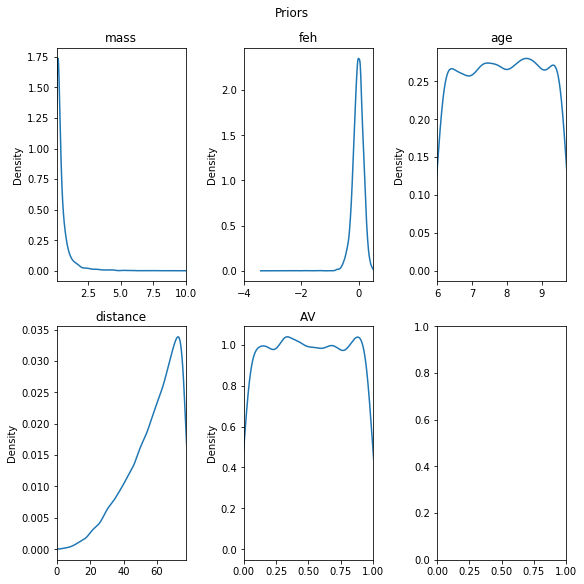

In [28]:
fig = s.plot_isochrones_priors()

In [29]:
s.target_coord.distance

<Distance 38.60840238 pc>

In [30]:
#change priors
# from isochrones.priors import FlatPrior, DistancePrior
# mod.set_prior(feh=FlatPrior((-2, 0.5)), distance=DistancePrior(1000))

In [31]:
#run isochrone single star model
mod = s.run_isochrones(iso_params=iso_params, 
                       overwrite=True,
                       n_live_points=1000 #multinest parameter
                      )

Using previously initialized model.


In [32]:
s.isochrones_model.map_pars

array([ 2.01536119e+02,  7.68800379e+00, -1.49579062e-01,  3.86000156e+01,
        2.66145256e-01])

In [33]:
s.isochrones_model.param_names

('eep', 'age', 'feh', 'distance', 'AV')

## derived samples

In [34]:
s.get_isochrones_results_summary()

,eep,age,feh,mass,initial_mass,radius,density,logTeff,Teff,logg,...,BP_mag,RP_mag,W1_mag,W2_mag,W3_mag,TESS_mag,Kepler_mag,parallax,distance,AV
count,5434.000000,5434.000000,5434.000000,5434.000000,5434.000000,5434.000000,5434.000000,5434.000000,5434.000000,5434.000000,...,5434.000000,5434.000000,5434.000000,5434.000000,5434.000000,5434.000000,5434.000000,5434.000000,5434.000000,5434.000000
mean,257.980034,8.514666,-0.115395,0.853982,0.853994,0.764604,2.705343,3.728214,5349.693348,4.601994,...,9.161893,8.139583,6.898458,6.927122,6.871359,8.129075,8.637212,25.890710,38.624478,0.213079
std,36.850264,0.541147,0.078432,0.013107,0.013096,0.006020,0.069249,0.007608,93.751165,0.008755,...,0.013743,0.007606,0.012710,0.017238,0.015370,0.007579,0.010221,0.100744,0.150332,0.091147
min,197.814409,7.579419,-0.424603,0.789422,0.789492,0.743061,2.432531,3.709318,5120.758152,4.565682,...,9.111486,8.111005,6.853676,6.868920,6.819292,8.099957,8.600250,25.469821,38.051437,0.000750
25%,225.944792,8.042469,-0.167882,0.846990,0.847007,0.760526,2.666051,3.722804,5282.855939,4.597600,...,9.152567,8.134565,6.889832,6.915342,6.860969,8.123996,8.630209,25.824473,38.523648,0.150487
50%,254.730469,8.461957,-0.113660,0.855971,0.855980,0.764644,2.712159,3.728167,5348.229579,4.603599,...,9.161795,8.139374,6.898473,6.927225,6.871244,8.128912,8.637062,25.892125,38.621782,0.213718
75%,287.810938,8.944899,-0.060922,0.863068,0.863073,0.768686,2.753393,3.733407,5413.182538,4.607981,...,9.171241,8.144635,6.906900,6.939155,6.881917,8.134029,8.644012,25.958082,38.722959,0.275820
max,337.761641,9.697637,0.142728,0.887881,0.887883,0.783683,2.901136,3.755844,5700.622359,4.622358,...,9.209462,8.169413,6.940269,6.980345,6.919702,8.158727,8.674446,26.280216,39.262153,0.504061


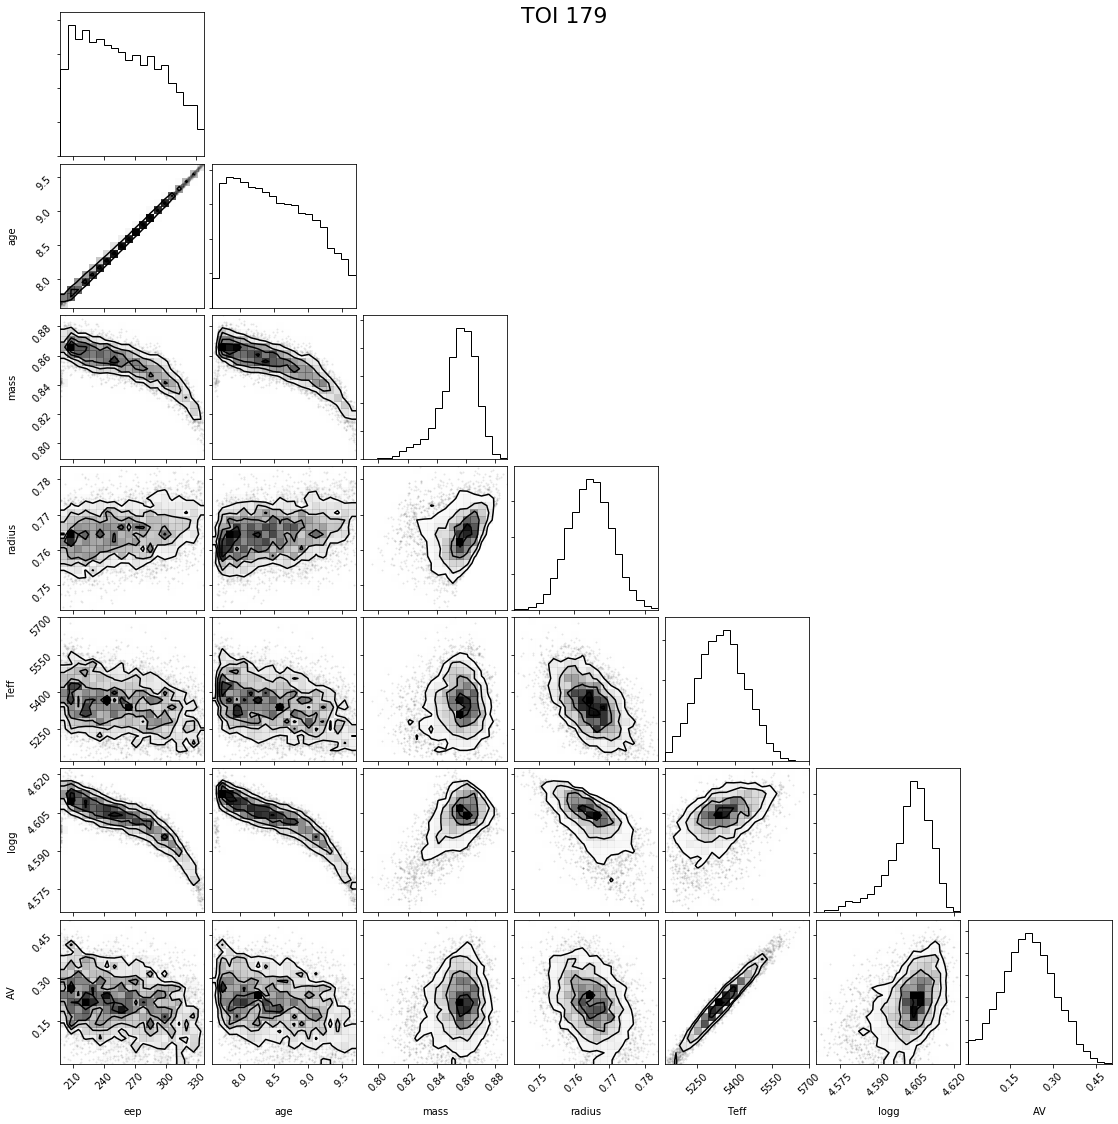

In [35]:
cols = "eep age mass radius Teff logg AV".split()
fig = s.isochrones_model.corner_derived(cols)

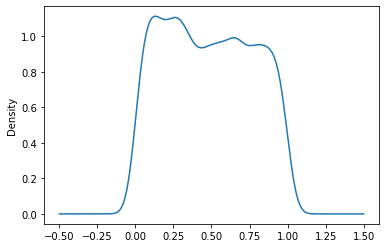

In [99]:
s.isochrones_model.derived_samples.AV.plot(kind='kde')

### evolutionary stage

Based on Table II in [MIST README](http://waps.cfa.harvard.edu/MIST/README_tables.pdf), the star is 

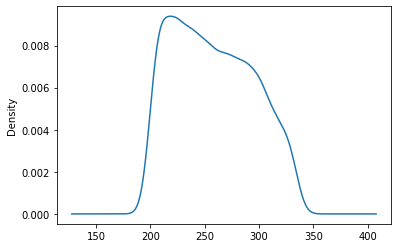

In [36]:
s.isochrones_model.derived_samples.eep.plot(kind='kde')

In [37]:
s.isochrones_model.derived_samples.eep.median()

254.73046884968693

(0, 1000.0)

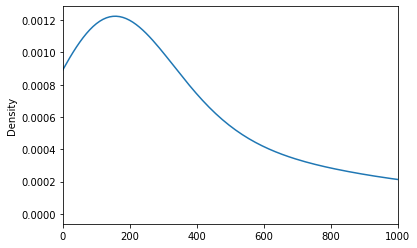

In [53]:
ax = s.isochrones_model.derived_samples.age.apply(lambda x: (10**x)/1e6).plot(kind='kde')
ax.set_xlim(0, 1e3)

In [62]:
s.mist_eep_table

,Primary EEP,EEP Number,Phase,Comment
0,1,1,pre-main sequence (PMS),Medium Mass Type
1,2,202,zero age main sequence (ZAMS),Medium Mass Type
2,3,353,intermediate age main sequence (IAMS ),Medium Mass Type
3,4,454,terminal age main sequence (TAMS),Medium Mass Type
4,5,605,tip of the red giant branch (RGBTip),Medium Mass Type
5,6,631,zero age core helium burning (ZACHeB),Medium Mass Type
6,6,631,zero age horizontal branch (ZAHB),Low Mass Type
7,7,707,terminal age core helium burning (TACHeB),aka terminal age horizontal branch (TAHB)
8,8,808,thermally pulsating asymptotic giant branch (...,Low Mass Type
9,8,808,carbon burning (C-burn),High Mass Type
